# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warings
import warnings
warnings.filterwarnings('ignore')

# Importing the Data


In [ ]:
url = "https://www.kaggle.com/datasets/yasserh/titanic-dataset/data"

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 34.9MB/s]


In [ ]:
!unzip titanic.zip

unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
df=pd.read_csv("/content/titanic-dataset.zip")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [ ]:
x=df['Survived'].value_counts().sort_index(ascending=False)

<BarContainer object of 2 artists>

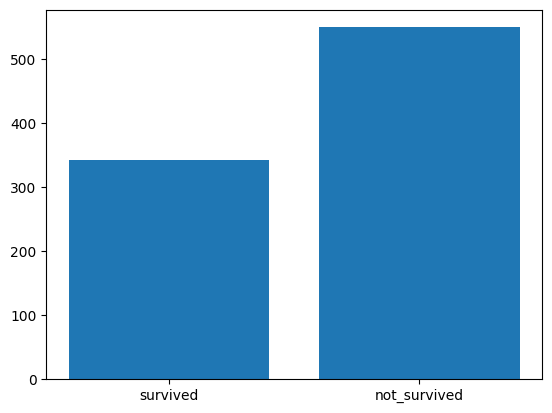

In [ ]:
plt.bar(['survived','not_survived'],x)

In [ ]:
data=df.groupby(['Sex'])['Survived'].value_counts().reset_index(name='counts')
data

,Sex,Survived,counts
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


<Axes: xlabel='Survived', ylabel='counts'>

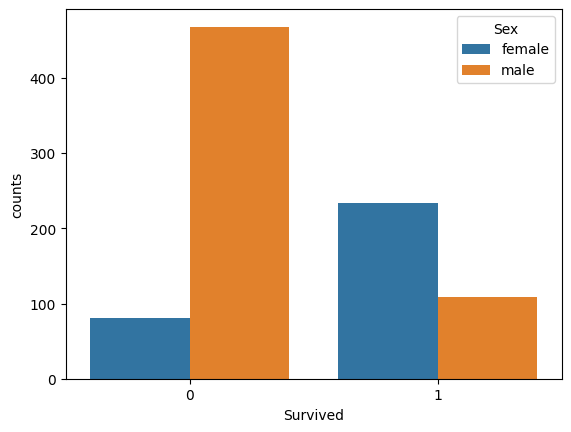

In [ ]:
sns.barplot(data=data,x='Survived',y='counts',hue='Sex')

In [ ]:
temp=df[df['Survived']==1]
data=temp.groupby('Pclass')['Survived'].value_counts().reset_index(name='counts')
data

,Pclass,Survived,counts
0,1,1,136
1,2,1,87
2,3,1,119


Text(0, 0.5, 'Number_of_Survived')

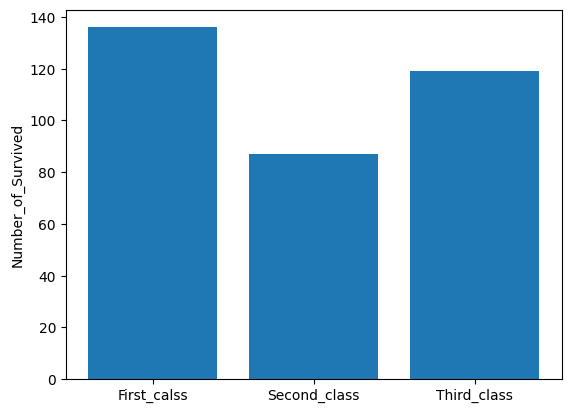

In [ ]:
plt.bar(['First_calss','Second_class','Third_class'],data['counts'])
plt.ylabel('Number_of_Survived')

# Preprocessing

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df['ticket'].nunique() # count unique values

681

In [ ]:
df.drop(['passengerid','name','ticket'],axis=1,inplace=True) # drop unnecessary columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


**handling missing values**

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
cabin,687
embarked,2


In [ ]:
df.drop(['cabin'],axis=1,inplace=True) # the best solution of this column -------> drop it

In [ ]:
df['embarked'].fillna(df['embarked'].mode(),inplace=True) # use mode bec. column is category

{'whiskers': [<matplotlib.lines.Line2D at 0x7cda732aa050>,
 'caps': [<matplotlib.lines.Line2D at 0x7cda732abfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cda732aa6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cda732ab640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cda732ab9d0>],
 'means': []}

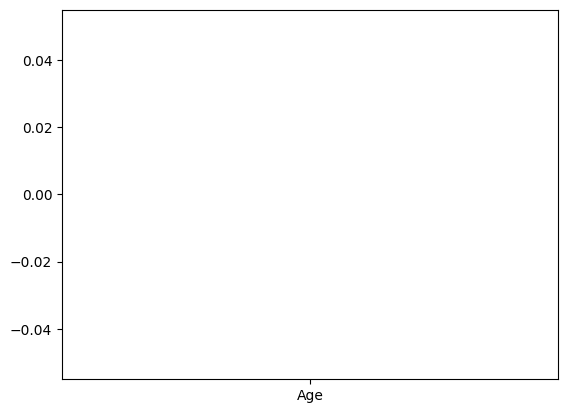

In [ ]:
plt.boxplot(df['age'],labels=['Age'])

In [ ]:
df['age'].fillna(df['age'].median(),inplace=True) # ues median bec. there are outliers

**Handling duplicated values**

In [ ]:
df.duplicated().sum()

116

In [ ]:
df=df.drop_duplicates()

**Handle outliers**

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
check=['age','fare'] # columns have high std

{'whiskers': [<matplotlib.lines.Line2D at 0x7cda7786e1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cda7786e6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cda7786df00>,
 'medians': [<matplotlib.lines.Line2D at 0x7cda7786ec20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cda7786eec0>,
 'means': []}

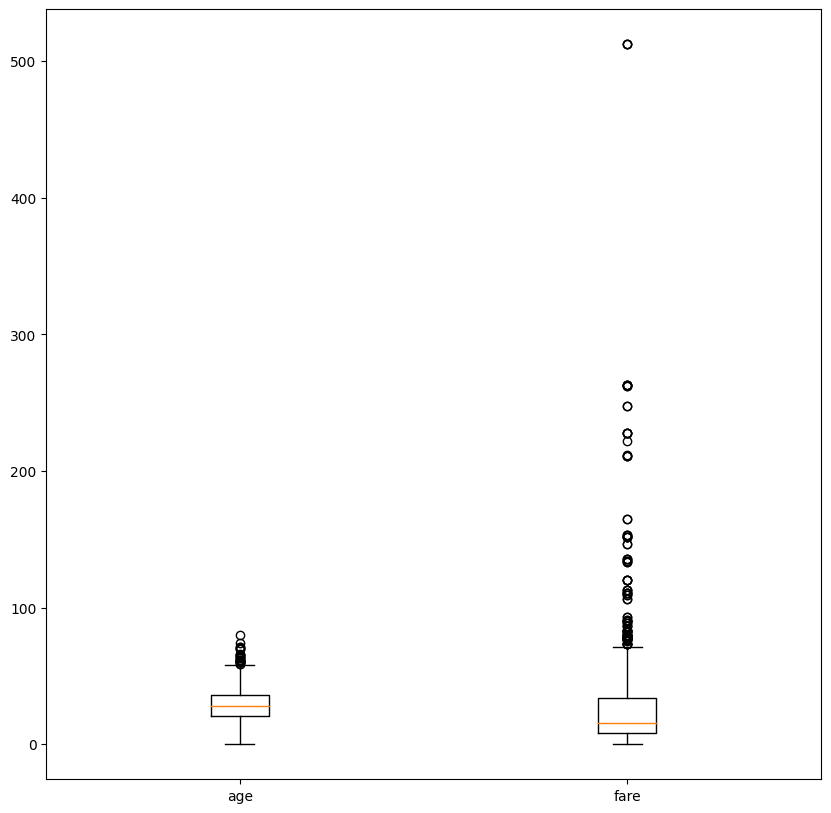

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(df[check],labels=check)

In [ ]:
# handle outlier in age
Q3=df['age'].quantile(0.75)
Q1=df['age'].quantile(0.25)
IQR=Q3-Q1
thre_mx=Q3+1.5*IQR
thre_mn=Q1-1.5*IQR
df['age'][df['age']>thre_mx]=thre_mx
df['age'][df['age']<thre_mn]=thre_mn

In [ ]:
# handle outlier in fare
Q3=df['fare'].quantile(0.75)
Q1=df['fare'].quantile(0.25)
IQR=Q3-Q1
thre_mx=Q3+1.5*IQR
df['fare'][df['fare']>thre_mx]=thre_mx

{'whiskers': [<matplotlib.lines.Line2D at 0x7cda778f28f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cda778f2e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cda778f2650>,
 'medians': [<matplotlib.lines.Line2D at 0x7cda778f3370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cda778f3610>,
 'means': []}

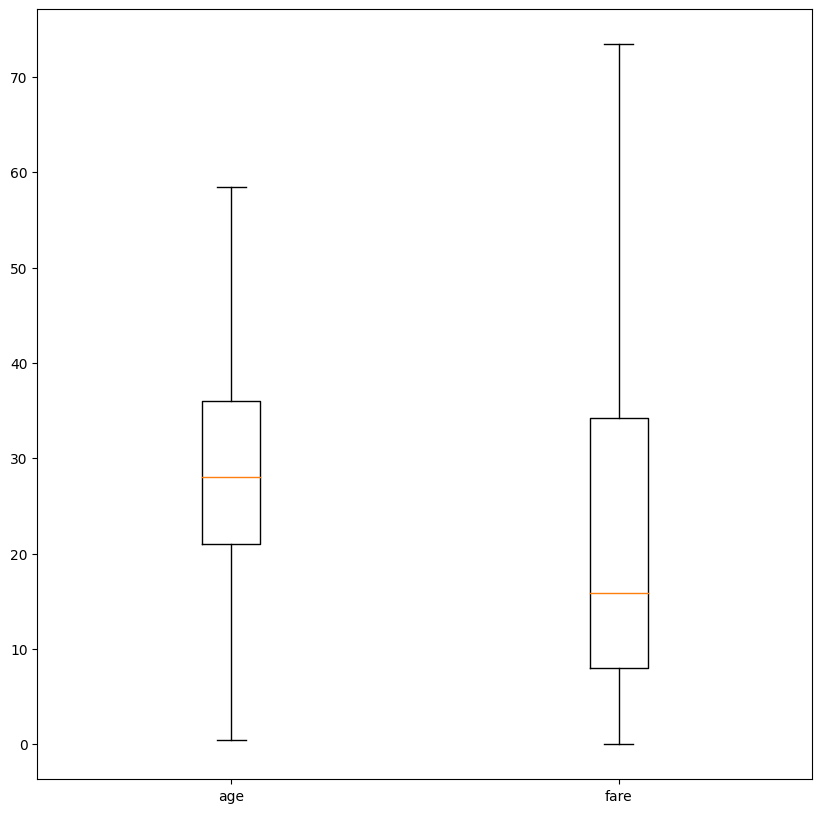

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(df[check],labels=check)

**Encoding categorical** **variables**

In [ ]:
df.select_dtypes('object').columns

Index(['sex', 'embarked'], dtype='object')

In [ ]:
# using dummies
df=pd.get_dummies(df,columns=['sex','embarked'])

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
#sure all columns are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    775 non-null    int64  
 1   pclass      775 non-null    int64  
 2   age         775 non-null    float64
 3   sibsp       775 non-null    int64  
 4   parch       775 non-null    int64  
 5   fare        775 non-null    float64
 6   sex_female  775 non-null    bool   
 7   sex_male    775 non-null    bool   
 8   embarked_C  775 non-null    bool   
 9   embarked_Q  775 non-null    bool   
 10  embarked_S  775 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


**Colleration**

<Axes: >

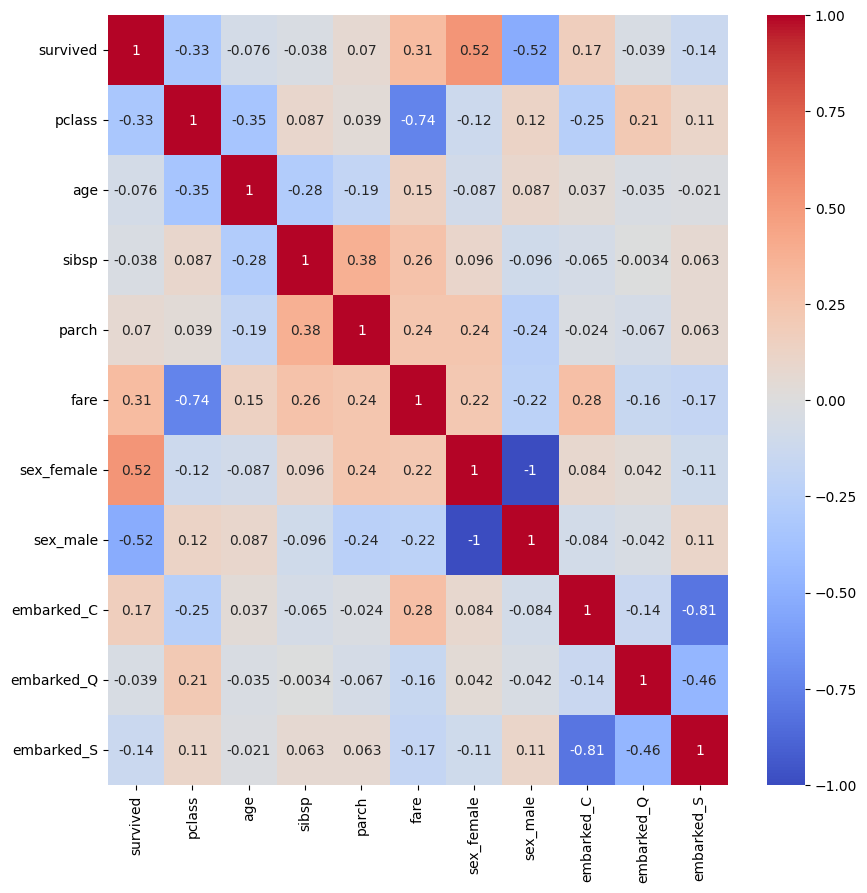

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
df.drop(['fare'],axis=1,inplace=True) # drop fare bec. there is high colleration between fare and pclass

**Distribution of data**

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>, <Axes: >]], dtype=object)

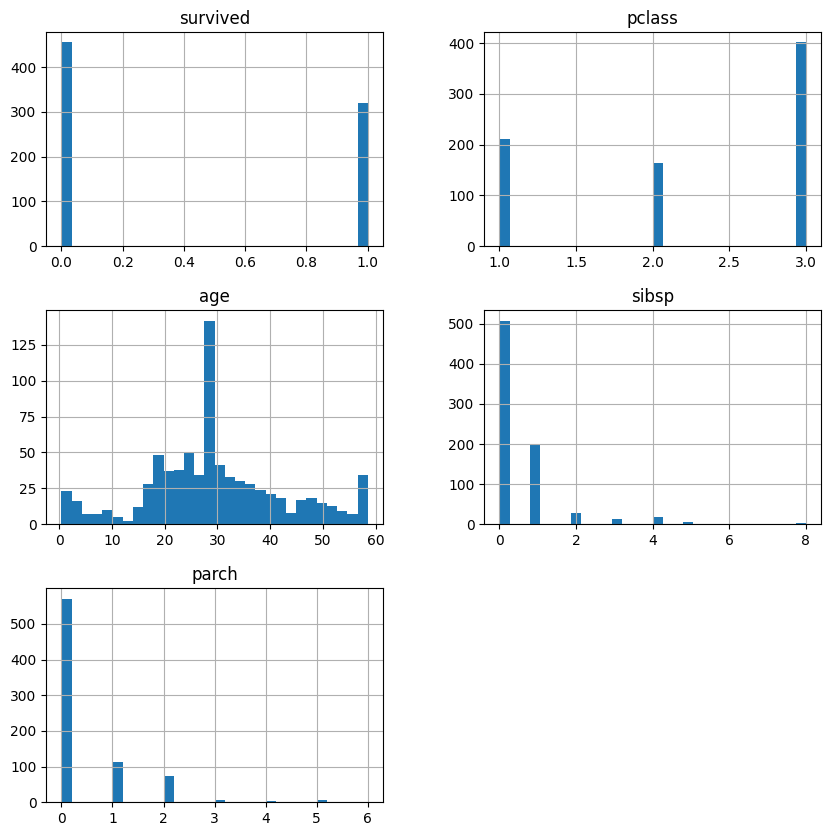

In [ ]:
df.hist(bins=30,figsize=(10,10))

**Normalization**

In [ ]:
# use Standardscaler with columns follow normal distribution
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['age']=scaler.fit_transform(df[['age']])

In [ ]:
#use MinMaxScaler with columns do not follow normal distribution
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['parch','sibsp','pclass']]=scaler.fit_transform(df[['parch','sibsp','pclass']])

# Models

**split data to X&Y-----> train&test**

In [ ]:
x=df.drop(['survived'],axis=1)
y=df['survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       103
           1       0.67      0.77      0.71        52

    accuracy                           0.79       155
   macro avg       0.77      0.79      0.78       155
weighted avg       0.80      0.79      0.80       155



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        91
           1       0.72      0.67      0.69        64

    accuracy                           0.75       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155

